100%|██████████| 100/100 [04:33<00:00,  2.45s/it]


Min route length: 24670


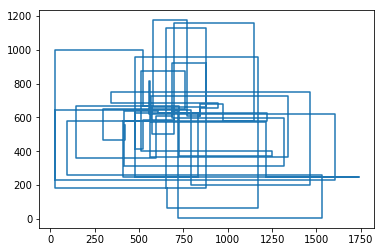

In [82]:
import pandas as pd
import numpy as np
import math
from tqdm import tqdm
from numpy.random import choice


df = pd.read_csv('tsp.csv', header=None, names = ['n', 'x', 'y'])


def dist(df, perm):
    m = df.shape[0]
    d=0
    for n in range(1, m):
        u = df.iloc[perm[n]]-df.iloc[perm[n-1]]
        d += abs(u.x)+abs(u.y)
    return d


def step(df, perm):
    d_list = []
    d_prob = []
    d_start = dist(df, perm)
    for m in range(0,df.shape[0]-1):
        a = perm.copy()
        a[m] = perm[m+1]
        a[m+1] = perm[m]
        d_list.append(a)
        d_prob.append(math.exp(min((d_start - dist(df, a)),700)))
    d_prob = [x/sum(d_prob) for x in d_prob]
    ch = choice(range(0,51), 1, p=d_prob)
    perm2 = d_list[ch[0]]
    return d_list[ch[0]]
     
    
d_list = []
perm = np.random.permutation(df.shape[0])
d_list.append([perm, dist(df, perm)])
for i in tqdm(range(100)):
    perm = step(df, perm)
    d_list.append([perm, dist(df, perm)])
    
    
best_perm = min(d_list, key = lambda t: t[1])
print('Min route length: %s' %best_perm[1])

df2 = df
df2['perm'] = best_perm[0]*2

df2 = df2.set_index(df['perm']).drop(columns = ['perm'])

for k in range(1, 103, 2):
    df2.loc[k] = np.array([0,df2.loc[k+1,'x'],df2.loc[k-1,'y']])

df2 = df2.sort_index()

plt.plot(df2.x, df2.y)
plt.show()